## Homework #1

Name: Young, James Yang

SID: 20740589

#### Question 1

This problem is convex as the objective function $\mathbf{w}^\top\boldsymbol{\Sigma}\mathbf{w}$ is a quadratic function with $\mathbf{w}\ge0$ so therefore the objective function is convex. The constraints are linear meaning they are affine constraint functions. This means that is a quadratic optimization problem (QP) which is a convex optimization problem. 

#### Question 2

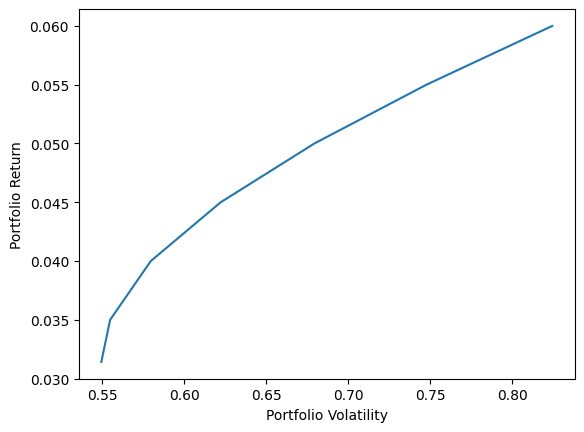

In [1]:
# import packages
from scipy import optimize as opt
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# define variables
beta = np.array([0,0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06]) # beta (lower bound of expected returns)
sigma = np.array([[1.0, -0.003, 0.02],[-0.003, 1.0, -0.15], [0.02, -0.15, 1.0]]) #sigma (covariance)
mu = np.array([[0.02],[0.003],[0.07]]) # mu (expected stock returns)
n = 3 # number of assets
w = cp.Variable(n) # portfolio
portfolio_ret = mu.T @ w # portfolio expected return
objective = cp.QuadForm(w, sigma) # objective function
n = beta.shape[0] # get size of beta
portfolio_expected_return = np.zeros(n)
portfolio_volatility = np.zeros(n) 


# define and solve problem
for i in range(n):
    prob = cp.Problem(cp.Minimize(objective),
                    [portfolio_ret >= beta[i],
                    w >= 0,
                    cp.sum(w) == 1])
    prob.solve()
    solutions = np.array([w.value]) # value of w*
    portfolio_expected_return[i] = solutions @ mu # PortfolioExpectedReturn
    portfolio_volatility[i] = np.sqrt(solutions @ sigma @ solutions.T) # PortfolioVolatility
    

# Plot figure
fig1 = plt.figure()
plt.plot(portfolio_volatility,portfolio_expected_return)
plt.xlabel("Portfolio Volatility")
plt.ylabel("Portfolio Return")
plt.show()

### Question 3

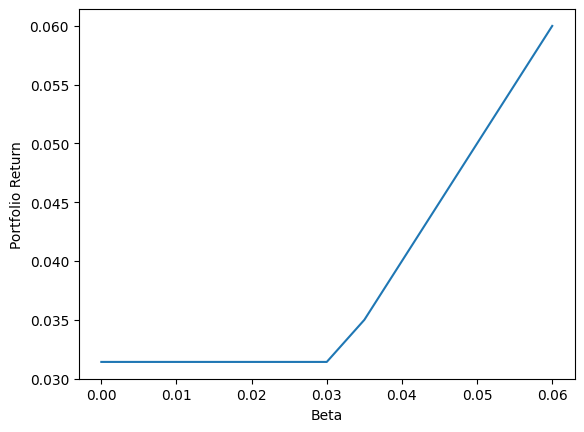

In [2]:
# create plot of portfolio expected return vs beta
fig2 = plt.figure()
plt.plot(beta,portfolio_expected_return)
plt.xlabel("Beta")
plt.ylabel("Portfolio Return")
plt.show()


The inequality constraint $\mu ^ \top w \ge \beta$ is active for $\beta = 0.03$.

At $\beta = 0.07$, the portfolio volatility (as shown in code below) approaches 1 meaning the risk is extremely high. When $\beta > 0.07$, there is no solution found.

In [3]:
prob123 = cp.Problem(cp.Minimize(objective),
                    [portfolio_ret >= 0.07,
                    w >= 0,
                    cp.sum(w) == 1])
prob123.solve()
# print(w.value)
print("Volatility at beta = 0.07 is: " + str(np.sqrt(np.array([w.value]) @ sigma @ np.array([w.value]).T)))

Volatility at beta = 0.07 is: [[1.]]


### Question 4

In [4]:
# define variables
beta = np.array([0,0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06]) # beta (lower bound of expected returns)
sigma = np.array([[1.0, -0.003, 0.02],[-0.003, 1.0, -0.15], [0.02, -0.15, 1.0]]) #sigma (covariance)
mu = np.array([[0.02],[0.003],[0.07]]) # mu (expected stock returns)
n = 3 # number of assets
w = cp.Variable(n) # portfolio
portfolio_ret = mu.T @ w # portfolio expected return
objective = cp.QuadForm(w, sigma) # objective function
n = beta.shape[0] # get size of beta
portfolio_expected_return = np.zeros(n)
portfolio_volatility = np.zeros(n) 
meth1_speed = np.zeros(n)
meth2_speed = np.zeros(n)

Method #1:

In [5]:
# define and solve problem
for i in range(n):
    prob = cp.Problem(cp.Minimize(objective),
                    [portfolio_ret >= beta[i],
                    w >= 0,
                    cp.sum(w) == 1])
    prob.solve()
    solutions = np.array([w.value]) # value of w*
    portfolio_expected_return[i] = solutions @ mu
    portfolio_volatility[i] = np.sqrt(solutions @ sigma @ solutions.T)
    # check if beta is same at 0.01
    if(beta[i] == 0.01):
        print("w* = " + str(w.value) + " at beta = 0.01.")
    # get time taken to solve each problem
    meth1_speed[i]=prob.solver_stats.solve_time
# get average by taking sum and dividing by n
avg_speed_1 = np.sum(meth1_speed)/n
print("Average solve time was: "+str(avg_speed_1))

w* = [0.29585799 0.35502959 0.34911243] at beta = 0.01.
Average solve time was: 0.00011303530769230767


Method #2

In [6]:
# Method 2 
beta_parameter = cp.Parameter(nonneg=True)
problem = cp.Problem(cp.Minimize(objective),
                    [portfolio_ret >= beta_parameter,
                    w >= 0,
                    cp.sum(w) == 1])

for i in range(n):
    beta_parameter.value = beta[i]
    problem.solve()
    # check if beta is same at 0.01
    if(beta[i] == 0.01):
        print("w* = " + str(w.value) + " at beta = 0.01.")
    # get time taken to solve each problem
    meth2_speed[i]=prob.solver_stats.solve_time
# get average by taking sum and dividing by n
avg_speed_2 = np.sum(meth2_speed)/n
print("Average solve time was: "+str(avg_speed_2))

w* = [0.29585799 0.35502959 0.34911243] at beta = 0.01.
Average solve time was: 9.358799999999999e-05


In [7]:
print("Method 2 is faster by around " + str(avg_speed_1/avg_speed_2) +" times.")

Method 2 is faster by around 1.207797021971916 times.


### Question 5

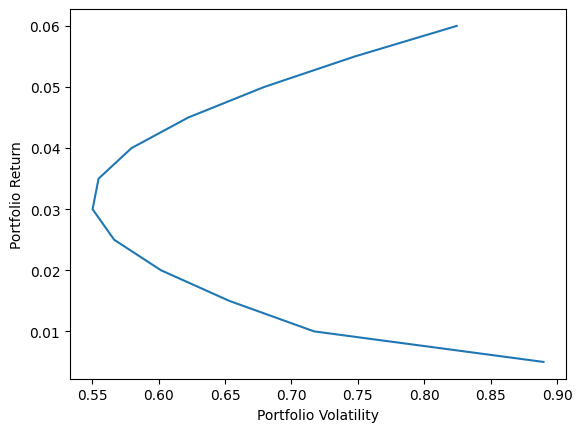

In [8]:
# same as Q2, but change constraint and beta
ret = np.zeros(n-1)
vol = np.zeros(n-1)
# skip over beta = 0 by changing loop range from 1 to 12
for i in range(1,n):
    prob = cp.Problem(cp.Minimize(objective),
                    [portfolio_ret == beta[i],
                    w >= 0,
                    cp.sum(w) == 1])
    prob.solve()
    sol = np.array([w.value]) # value of w*
    ret[i-1] = sol @ mu
    vol[i-1] = np.sqrt(sol @ sigma @ sol.T)

    

# Plot figure
fig = plt.figure()
plt.plot(vol,ret)
plt.xlabel("Portfolio Volatility")
plt.ylabel("Portfolio Return")
plt.show()


By changing the constraint to from $\mu ^⊤ w ≥ β$ to $\mu ^ ⊤ w = β$, the curve becomes different from Q2 as the new constraint means that the portfolio expected return will always be equal to beta, whereas in Q2 the portfolio expected value was only equal to beta at 0.03. This means that the solution will show less optimal values than in Q2 as we can see lower portfolio returns with higher volatility in the lower curve.